In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
import pandas as pd
import seaborn as sns

# Visualizing statistical relationships


relpot() : This is a figure-level function 



# sns.relplot(kind='line) => sns.lineplot()
### sns.relplot(kind='scatter')==sns.scatterplot()


In [2]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
sns.set_theme()

### Create a visualization using relplot (Figure-level interface for drawing relational plots onto a FacetGrid.)

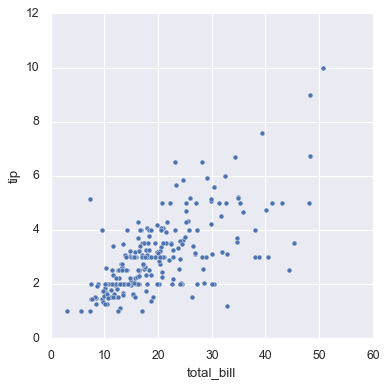

In [4]:
#scatter plot for numeric variables

sns.relplot(x='total_bill',y='tip',data=tips)

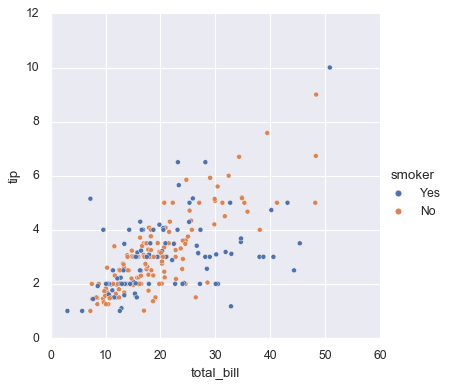

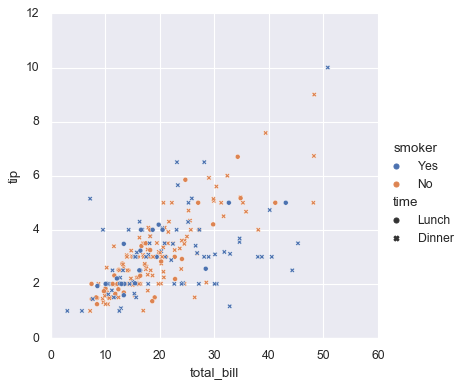

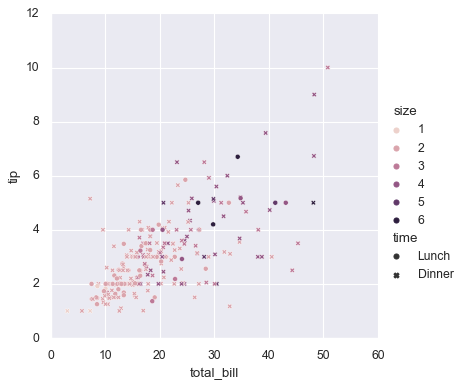

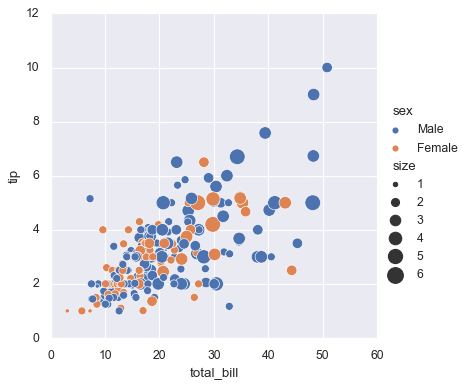

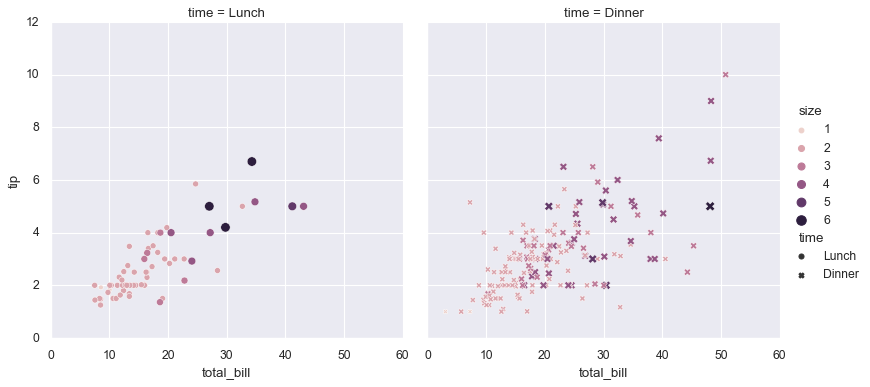

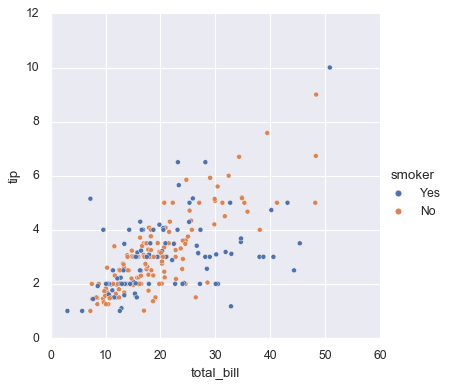

In [10]:
#add categorical variable as hue - qualitative palette

sns.relplot(x='total_bill',y='tip',data=tips,hue='smoker')
plt.show()

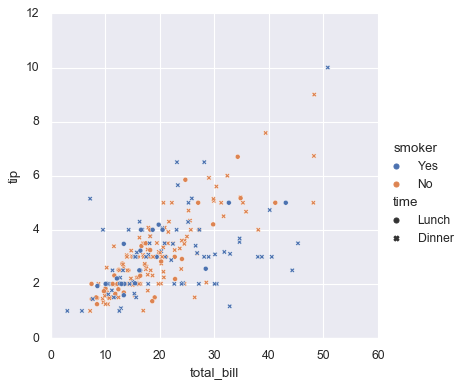

In [11]:
#add another marker (style)
sns.relplot(x='total_bill',y='tip',data=tips,hue='smoker',style='time')
plt.show()

In [9]:
#add second categorical varaible(now total 4 variables)


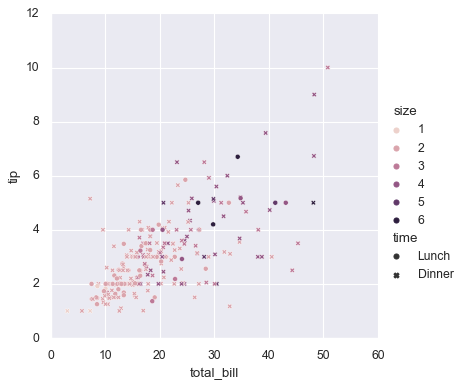

In [12]:
#add numerical variable as hue - sequential palette
sns.relplot(x='total_bill',y='tip',data=tips,hue='size',style='time')
plt.show()

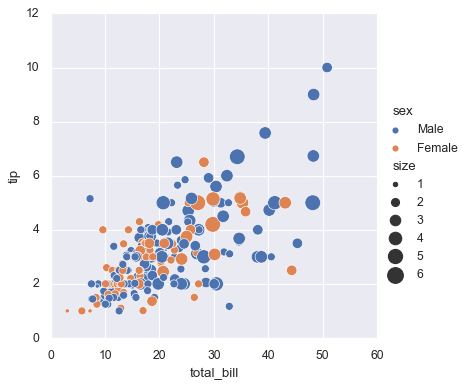

In [13]:
#bubble plot

sns.relplot(x='total_bill',y='tip',data=tips,size='size',sizes=(15,200),hue='sex')
plt.show()

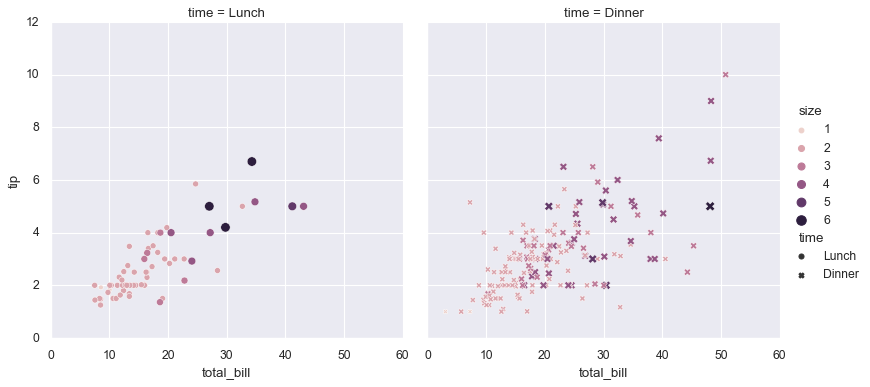

In [14]:
# draw multiple plots
sns.relplot(x='total_bill',y='tip',data=tips,hue='size',style='time',size='size',col='time')
plt.show()

# Line plot


In [15]:

df=pd.DataFrame(dict(time=np.arange(500),value=np.random.randn(500).cumsum()))
df.head()


,time,value
0,0,0.915944
1,1,0.644892
2,2,0.230862
3,3,2.489084
4,4,1.735522


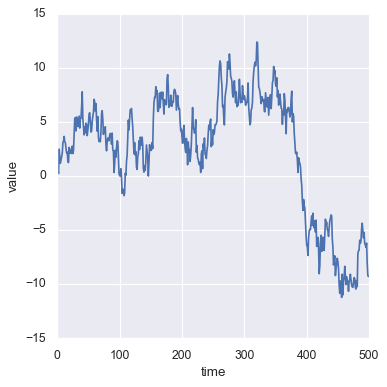

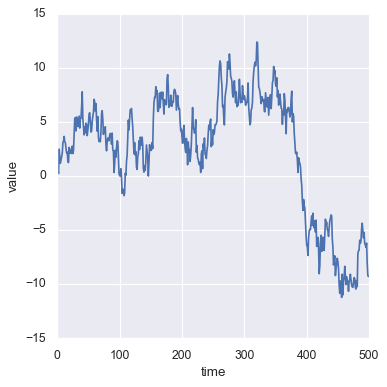

In [17]:
#lineplot
sns.relplot(data=df,x='time',y='value',kind='line')
plt.show()

# Aggregation and representing uncertainty

In [18]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


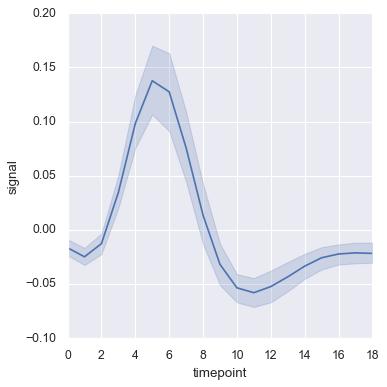

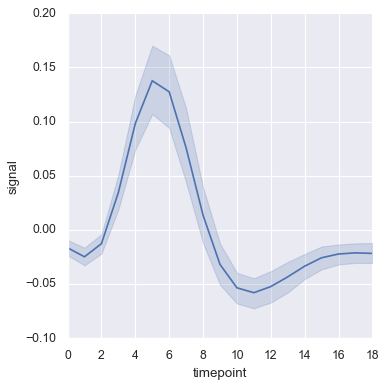

In [20]:
#with CI -default
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri)
plt.show()

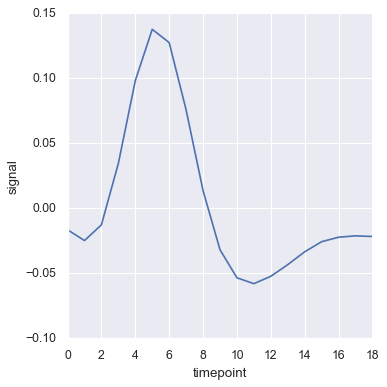

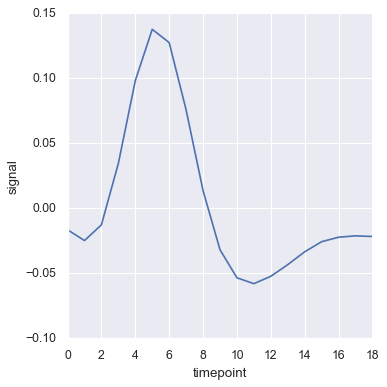

In [22]:
#disable CI
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,ci=None)
plt.show()

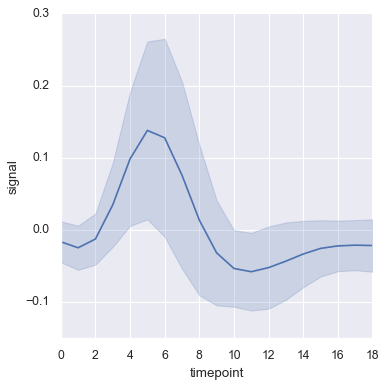

In [23]:
#plot SD
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,ci='sd')
plt.show()

### Plotting subsets of data with semantic mappings


### Add three additional variables by modifying the hue, size, and style of the plot elements

In [19]:
#add hue


In [20]:
#add style


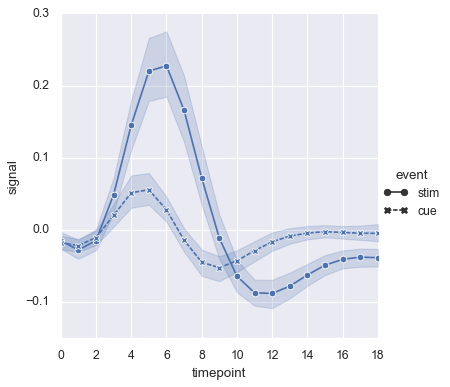

In [24]:
#use markers rather than dash lines for different events 
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,style='event',markers=True)
plt.show()

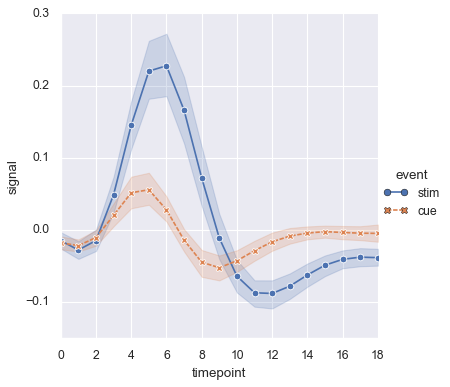

In [25]:
#alter both the color and style of the lines

sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,style='event',hue='event',markers=True)
plt.show()

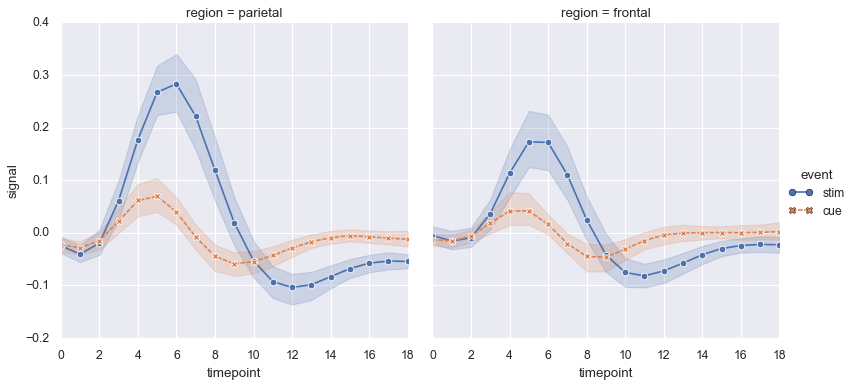

In [26]:
#differen subplots for diferent regions

sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,style='event',hue='event',markers=True,col='region')
plt.show()

### Showing multiple relationships with facets

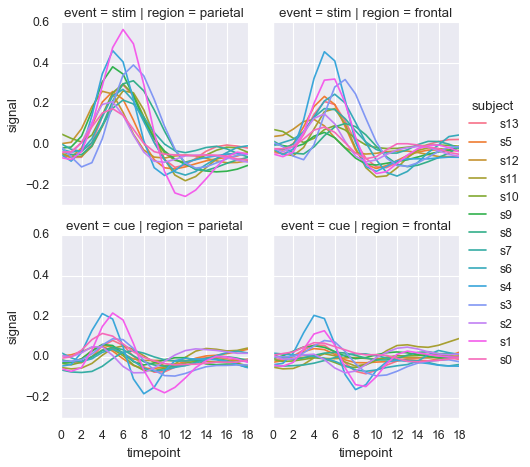

In [27]:


sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,hue='subject',col='region',row='event',height=3)
plt.show()

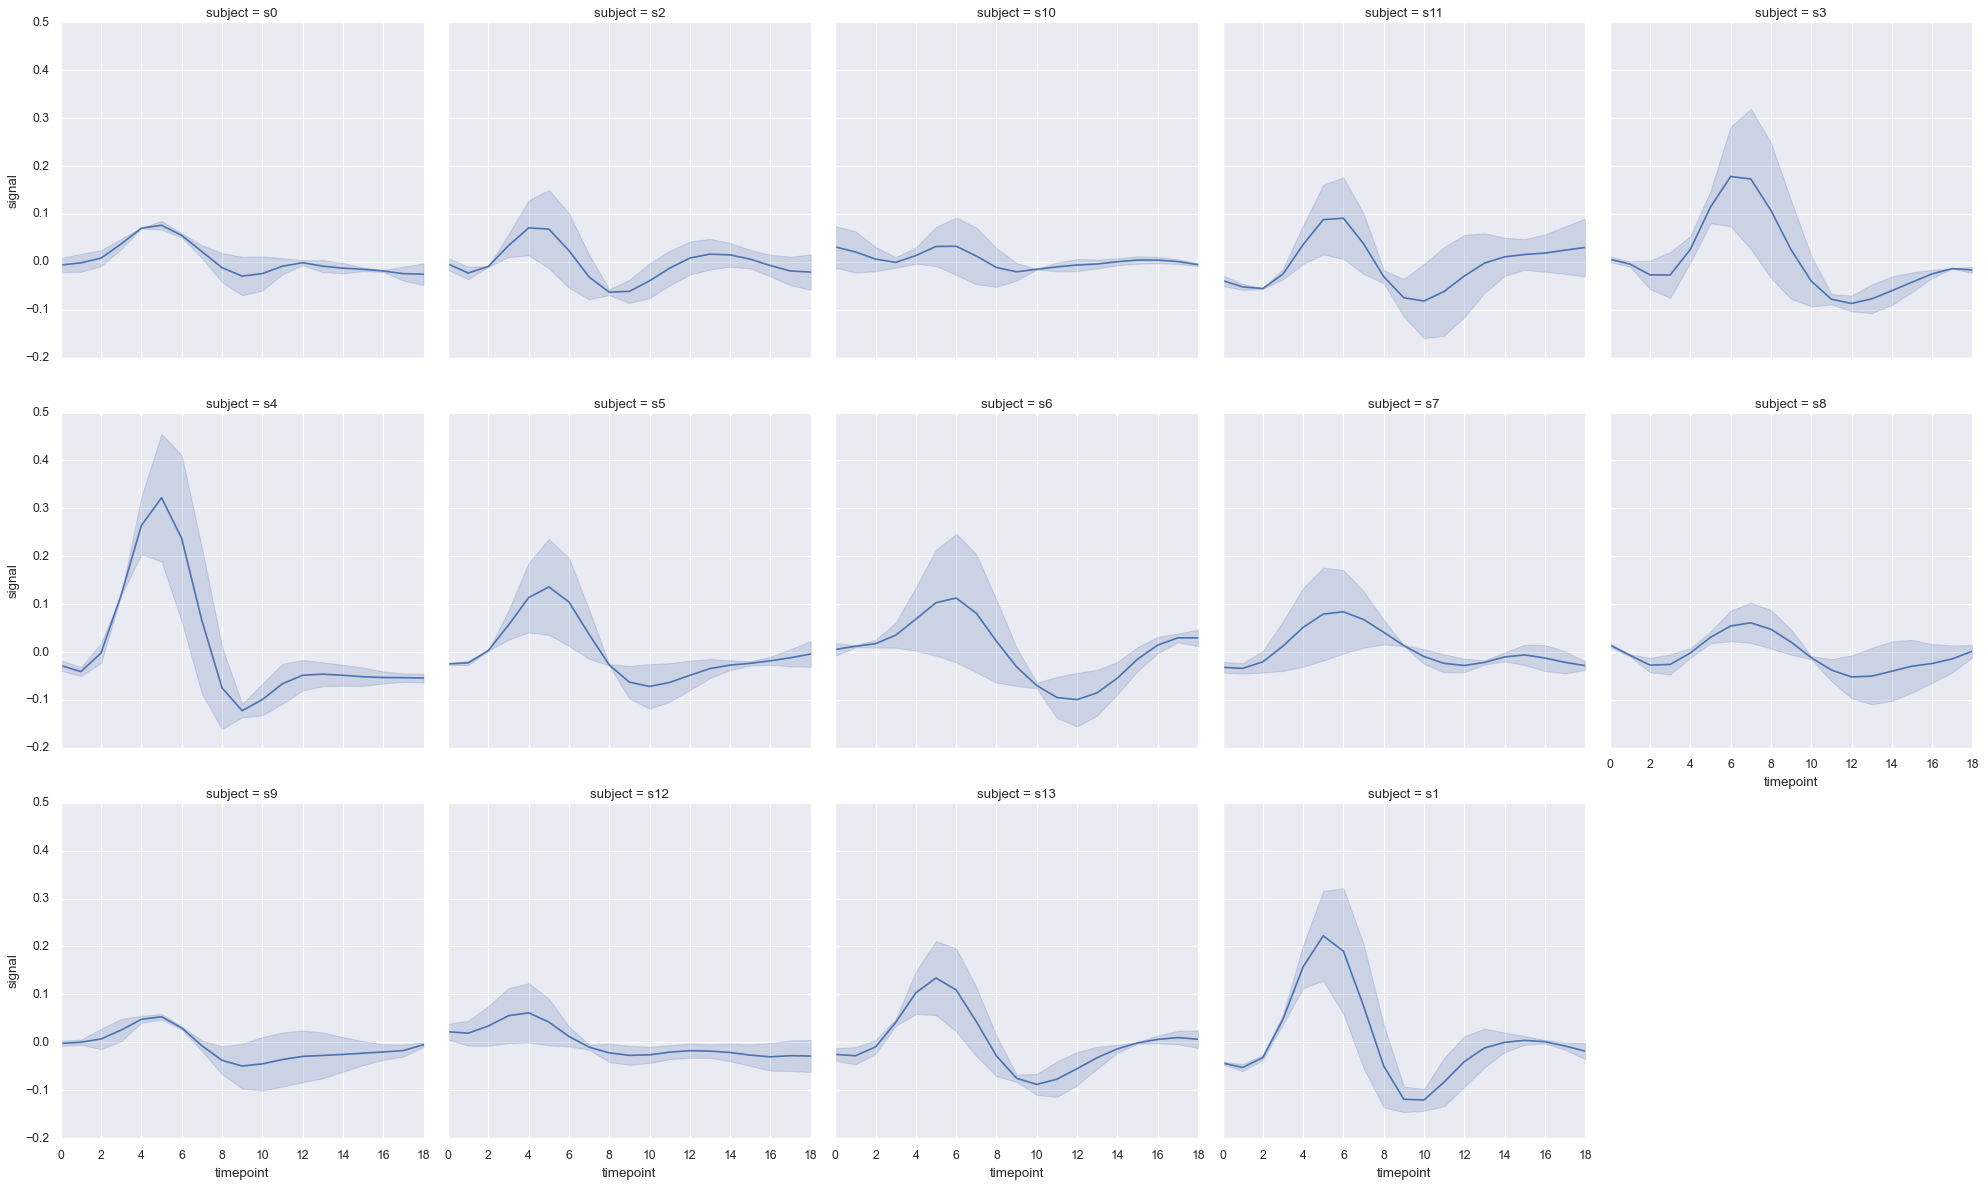

In [28]:
#Query fmri column region (region=='frontal')
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri.query("region=='frontal'"),col='subject',col_wrap=5)
plt.show()

# Linear Regression - lmplot, regplot


 regplot() : accepts numpy arrays, pandas Series, pandas DataFrame object. 
 
 lmplot() : accepts strings. This data format is called “long-form” or “tidy” data. Used to show “faceted” plots

In [29]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


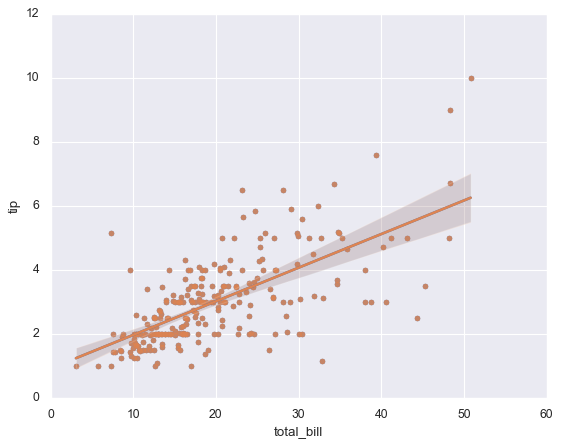

In [31]:
#using regplot - shows a single relationship

sns.regplot(x='total_bill',y='tip',data=tips)
plt.show()

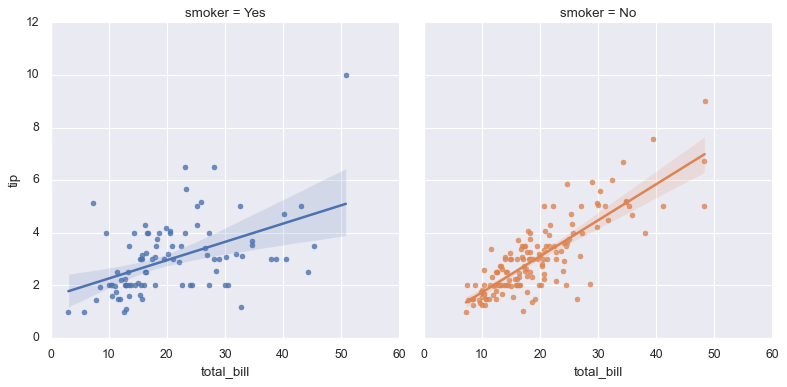

In [32]:
#using lmplot - allows subplots showing interactions with up to 3 categorical variables.
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker',col='smoker')
plt.show()

# Fitting different kinds of models

In [33]:
anscombe=sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


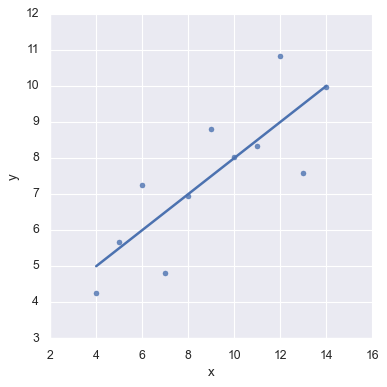

In [34]:
#dataset-1
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='I'"),ci=None)
plt.show()

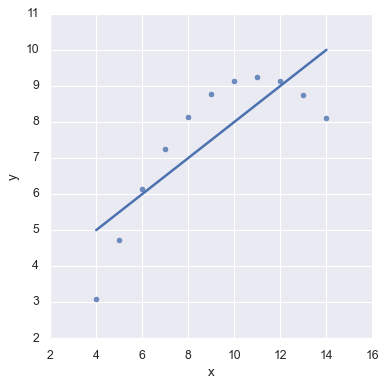

In [35]:
# II dataset
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='II'"),ci=None)
plt.show()

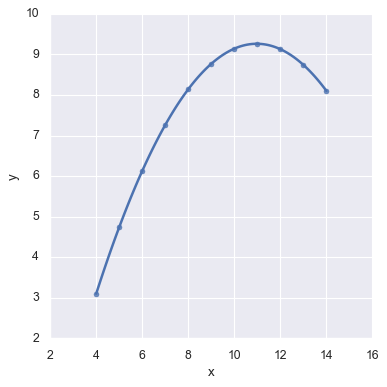

In [36]:
#polynomial regression for II dataset
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='II'"),ci=None,order=2)
plt.show()

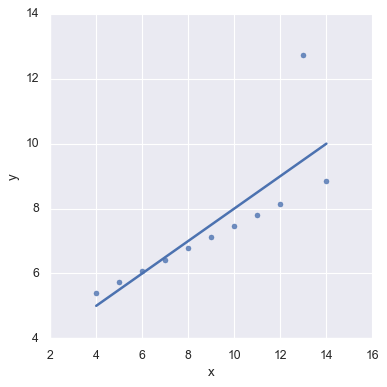

In [37]:
#III dataset (outlier presence)
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='III'"),ci=None)
plt.show()

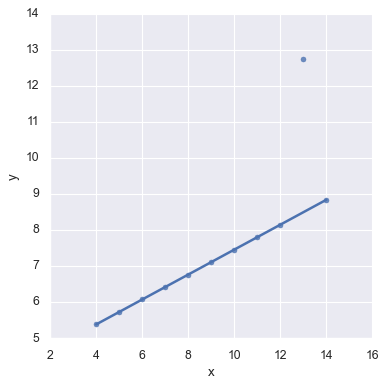

In [38]:
#robust regression to downweight relatively large residuals using different loss function
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='III'"),ci=None,robust=True)
plt.show()

### residual plot

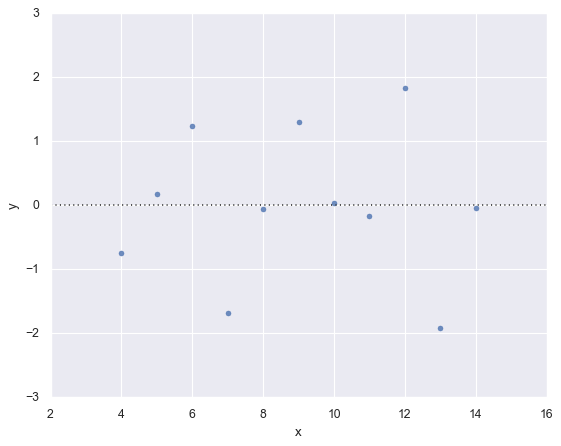

In [39]:
sns.residplot(x='x',y='y',data=anscombe.query("dataset=='I'"))
plt.show()

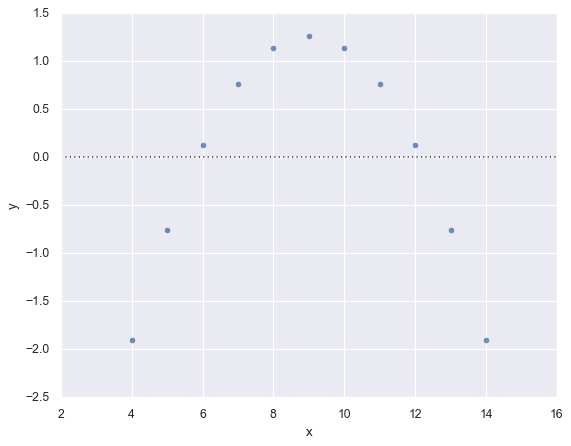

In [40]:
# residplot for II dataset
sns.residplot(x='x',y='y',data=anscombe.query("dataset=='II'"))
plt.show()

# Conditioning on other variables¶

In [38]:
#change marker and color Set1 is categorical color palette


### Plotting a regression in other contexts

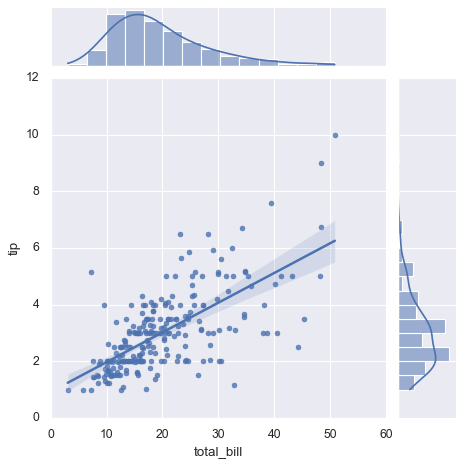

In [41]:
# jointplot() to show the linear regression fit on the joint axes by passing kind="reg"
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
plt.show()